In [2]:
from ucimlrepo import fetch_ucirepo 
  
mushroom = fetch_ucirepo(id=73) 
X = mushroom.data.features 
y = mushroom.data.targets 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = X.join(y)

In [8]:
target = 'poisonous'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [20]:
one_hot=0
for i in df:
    part_value = df[i].value_counts()#.reset_index()
    one_hot+=len(part_value)
    print(i, len(part_value),part_value.max(),part_value.min())

cap-shape 6 3656 4
cap-surface 4 3244 4
cap-color 10 2284 16
bruises 2 4748 3376
odor 9 3528 36
gill-attachment 2 7914 210
gill-spacing 2 6812 1312
gill-size 2 5612 2512
gill-color 12 1728 24
stalk-shape 2 4608 3516
stalk-root 4 3776 192
stalk-surface-above-ring 4 5176 24
stalk-surface-below-ring 4 4936 284
stalk-color-above-ring 9 4464 8
stalk-color-below-ring 9 4384 24
veil-type 1 8124 8124
veil-color 4 7924 8
ring-number 3 7488 36
ring-type 5 3968 36
spore-print-color 9 2388 48
population 6 4040 340
habitat 7 3148 192
poisonous 2 4208 3916


In [22]:
f"количиство категорий {one_hot-2}"

'количиство категорий 116'

честно хочется написать эмбединги, но с другой стороны лень

In [28]:
cols = list(df.columns)
cols.remove('poisonous')

In [47]:
df_part = df[['poisonous']]
for i in cols:
    df_part = df_part.join(pd.get_dummies(df[i],prefix =i).astype(int))

In [48]:
len(df_part.columns)

117

In [50]:
df_part[target] = (df[target] == 'p').astype(int)

In [51]:
df_part

,poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [78]:
import math
import copy
class Sigmoid:
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

class ReLU:
    def __call__(self, x):
        return np.where(x >= 0, x, 0)

    def gradient(self, x):
        return np.where(x >= 0, 1, 0)


In [87]:
class Linear:
    def __init__(self, n_units, input_shape=None):
        self.layer_input = None
        self.input_shape = input_shape
        self.n_units = n_units
        self.trainable = True
        self.W = None
        self.w0 = None

    def set_input_shape(self, shape):
        self.input_shape = shape

    def initialize(self, optimizer):
        limit = 1 / math.sqrt(self.input_shape[0])
        self.W  = np.random.uniform(-limit, limit, (self.input_shape[0], self.n_units))
        self.w0 = np.zeros((1, self.n_units))
        self.W_opt  = copy.copy(optimizer)
        self.w0_opt = copy.copy(optimizer)

    def parameters(self):
        return np.prod(self.W.shape) + np.prod(self.w0.shape)

    def forward_pass(self, X, training=True):
        self.layer_input = X
        return X.dot(self.W) + self.w0

    def backward_pass(self, accum_grad):
        W = self.W

        if self.trainable:
            grad_w = self.layer_input.T.dot(accum_grad)
            grad_w0 = np.sum(accum_grad, axis=0, keepdims=True)

            self.W = self.W_opt.update(self.W, grad_w)
            self.w0 = self.w0_opt.update(self.w0, grad_w0)

        accum_grad = accum_grad.dot(W.T)
        return accum_grad

    def output_shape(self):
        return (self.n_units, )

activation_functions = {
    'relu': ReLU,
    'sigmoid': Sigmoid,
}

class Activation:
    def __init__(self, name):
        self.activation_name = name
        self.activation_func = activation_functions[name]()
        self.trainable = True
    def set_input_shape(self, shape):
        self.input_shape = shape
    def layer_name(self):
        return "Activation (%s)" % (self.activation_func.__class__.__name__)

    def forward_pass(self, X, training=True):
        self.layer_input = X
        return self.activation_func(X)

    def backward_pass(self, accum_grad):
        return accum_grad * self.activation_func.gradient(self.layer_input)

    def output_shape(self):
        return self.input_shape


In [103]:
class CrossEntropy:
    def __init__(self): pass

    def loss(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return np.sum((y>0.5) == (p>0.5))/len(y)

    def gradient(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)

In [104]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, momentum=0):
        self.learning_rate = learning_rate 
        self.momentum = momentum
        self.w_updt = None

    def update(self, w, grad_wrt_w):
        if self.w_updt is None:
            self.w_updt = np.zeros(np.shape(w))
        self.w_updt = self.momentum * self.w_updt + (1 - self.momentum) * grad_wrt_w
        return w - self.learning_rate * self.w_updt

class Adam:
    def __init__(self, learning_rate=0.001, b1=0.9, b2=0.999):
        self.learning_rate = learning_rate
        self.eps = 1e-8
        self.m = None
        self.v = None
        self.b1 = b1
        self.b2 = b2

    def update(self, w, grad_wrt_w):
        if self.m is None:
            self.m = np.zeros(np.shape(grad_wrt_w))
            self.v = np.zeros(np.shape(grad_wrt_w))
        
        self.m = self.b1 * self.m + (1 - self.b1) * grad_wrt_w
        self.v = self.b2 * self.v + (1 - self.b2) * np.power(grad_wrt_w, 2)

        m_hat = self.m / (1 - self.b1)
        v_hat = self.v / (1 - self.b2)

        self.w_updt = self.learning_rate * m_hat / (np.sqrt(v_hat) + self.eps)

        return w - self.w_updt

In [125]:

def batch_iterator(X, y=None, batch_size=64):
    n_samples = X.shape[0]
    for i in np.arange(0, n_samples, batch_size):
        begin, end = i, min(i+batch_size, n_samples)
        if y is not None:
            yield X[begin:end], y[begin:end]
        else:
            yield X[begin:end]

class NeuralNetwork:
    def __init__(self, optimizer, loss, validation_data=None):
        self.optimizer = optimizer
        self.layers = []
        self.errors = {"training": [], "validation": []}
        self.acc = {"training": [], "validation": []}

        self.loss_function = loss()

        self.val_set = None
        if validation_data:
            X, y = validation_data
            self.val_set = {"X": X, "y": y}

    def set_trainable(self, trainable):
        for layer in self.layers:
            layer.trainable = trainable

    def add(self, layer):
        if self.layers:
            layer.set_input_shape(shape=self.layers[-1].output_shape())

        if hasattr(layer, 'initialize'):
            layer.initialize(optimizer=self.optimizer)

        self.layers.append(layer)

    def test_on_batch(self, X, y):
        y_pred = self._forward_pass(X, training=False)
        loss = np.mean(self.loss_function.loss(y, y_pred))
        acc = self.loss_function.acc(y, y_pred)

        return loss, acc

    def train_on_batch(self, X, y):
        y_pred = self._forward_pass(X)
        loss = np.mean(self.loss_function.loss(y, y_pred))
        acc = self.loss_function.acc(y, y_pred)
        loss_grad = self.loss_function.gradient(y, y_pred)
        self._backward_pass(loss_grad=loss_grad)

        return loss, acc

    def fit(self, X, y, n_epochs, batch_size):
        for _ in range(n_epochs):
            
            batch_error = []
            batch_acc = []
            for X_batch, y_batch in batch_iterator(X, y, batch_size=batch_size):
                loss, acc = self.train_on_batch(X_batch, y_batch)
                batch_error.append(loss)
                batch_acc.append(acc)

            self.errors["training"].append(np.mean(batch_error))
            self.acc["training"].append(np.mean(batch_acc))

            if self.val_set is not None:
                val_loss, val_acc = self.test_on_batch(self.val_set["X"], self.val_set["y"])
                self.errors["validation"].append(val_loss)
                self.acc["validation"].append(val_acc)

        return self.errors, self.acc

    def _forward_pass(self, X, training=True):
        layer_output = X
        for layer in self.layers:
            layer_output = layer.forward_pass(layer_output, training)

        return layer_output

    def _backward_pass(self, loss_grad):
        for layer in reversed(self.layers):
            loss_grad = layer.backward_pass(loss_grad)

    def predict(self, X):
        return self._forward_pass(X, training=False)

In [126]:
df_part.shape

(8124, 117)

In [130]:
from sklearn.model_selection import train_test_split
X, Y = df_part.drop([target],axis=1),df_part[[target]].to_numpy()
x, xt, y, yt = train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)

In [131]:
net = NeuralNetwork(optimizer=Adam(), loss=CrossEntropy,validation_data=(xt,yt))
net.add(Linear(128, input_shape=(116,)))
net.add(Activation('relu'))
net.add(Linear(32))
net.add(Activation('relu'))
net.add(Linear(1))


In [132]:
error, acc = net.fit(x,y,100,4000)

In [133]:
acc.keys()

dict_keys(['training', 'validation'])

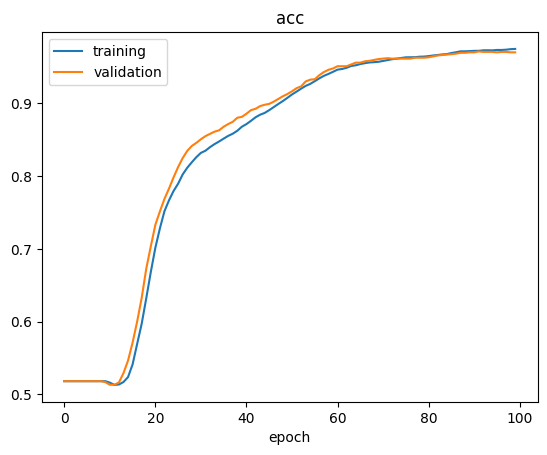

In [134]:
plt.plot(list(range(len(acc['training']))), acc['training'], label='training')
plt.plot(list(range(len(acc['validation']))), acc['validation'], label='validation')
plt.title('acc')
plt.xlabel("epoch")
plt.legend()
plt.show()

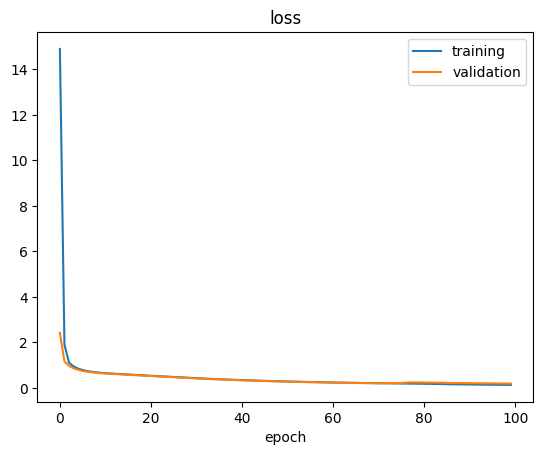

In [135]:
plt.plot(list(range(len(error['training']))), error['training'], label='training')
plt.plot(list(range(len(error['validation']))), error['validation'], label='validation')
plt.title('loss')
plt.xlabel("epoch")
plt.legend()
plt.show()

In [136]:
net.add(Activation('sigmoid'))

In [139]:
net.predict(x[:10])>0.5

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False]])

In [140]:
y[:10]

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [141]:
f"accuracy {np.sum((yt>0.5) == (net.predict(xt)>0.5))/len(yt)}"

'accuracy 0.9963076923076923'